In [1]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data preparation function

In [2]:
def makeDataPolus(data_path):
    data = pd.read_csv("data/" + data_path, sep=',', names=["PROC", "N", "TSTEPS", "TIME"])
    data_final = data[::3]
    length = len(data) // 3
    time = np.array(data["TIME"])
    time_new = np.zeros(length)
    for i in range(length):
        time_new[i] = (time[3*i] + time[3*i + 1] + time[3*i + 2]) / 3
    x = data_final["N"]
    y = data_final["TSTEPS"]
    z = time_new
    return x, y, z

Execution time dependence on array length and number of iterations. Different number of cores. Polus

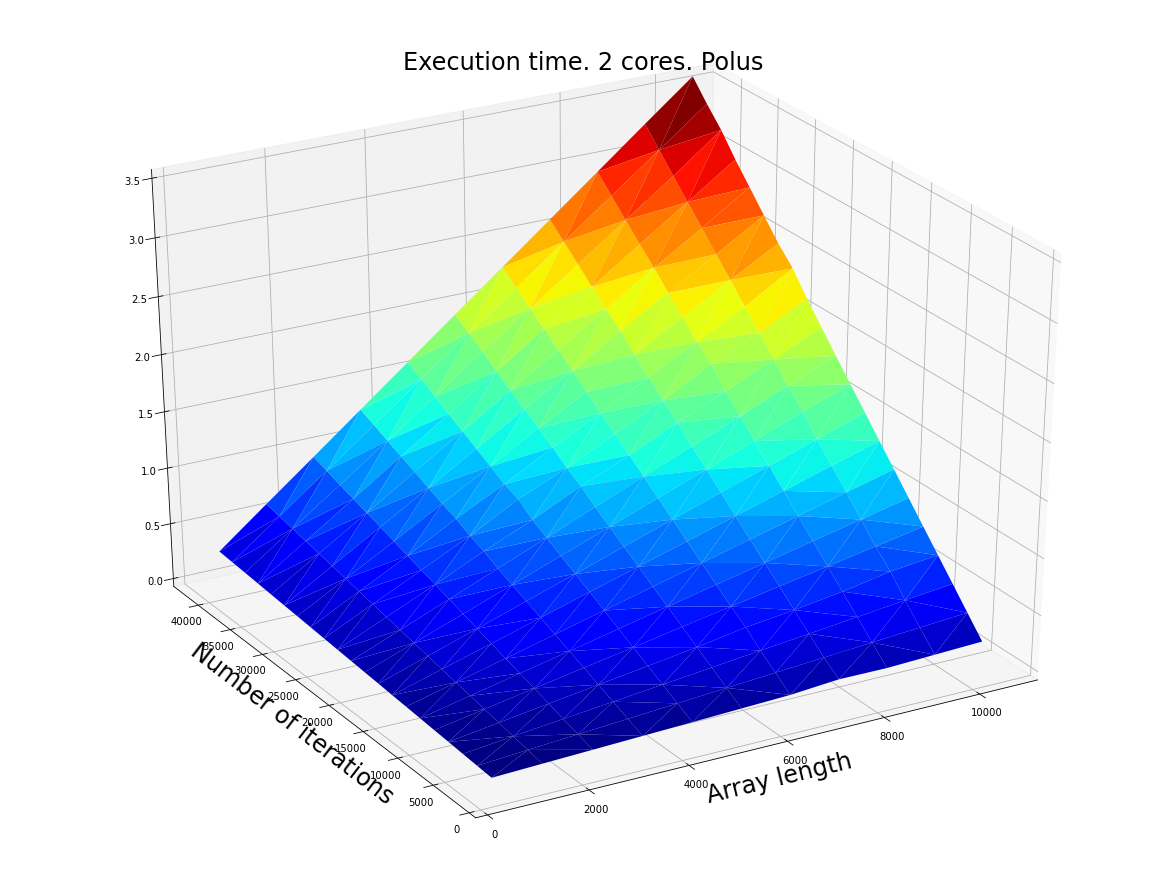

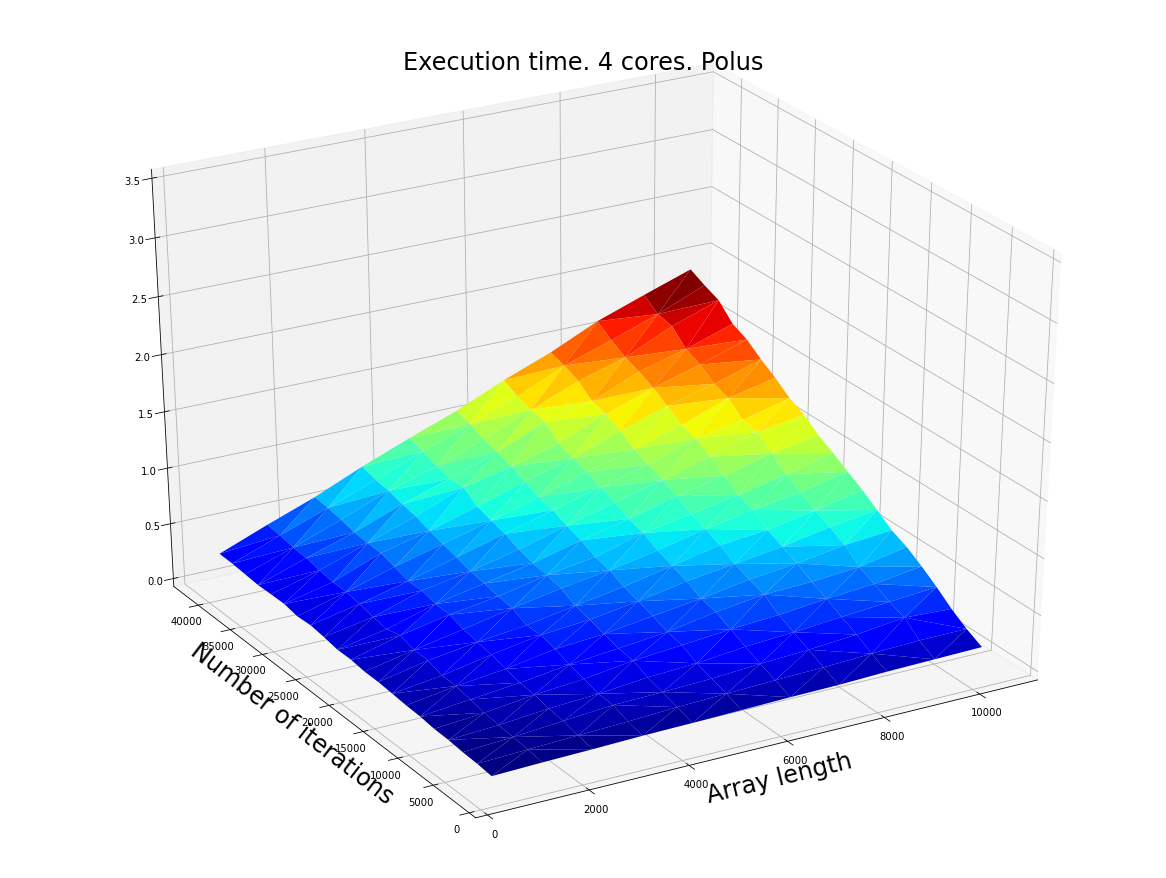

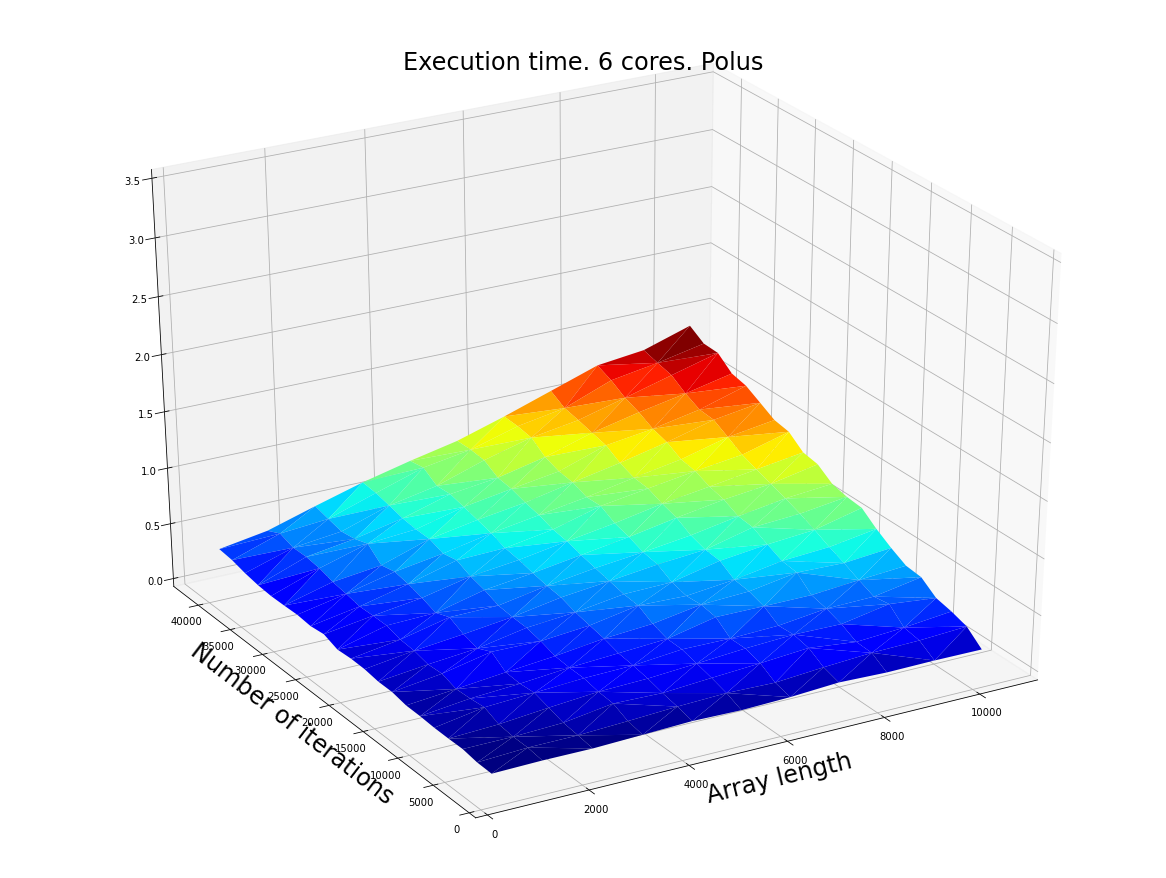

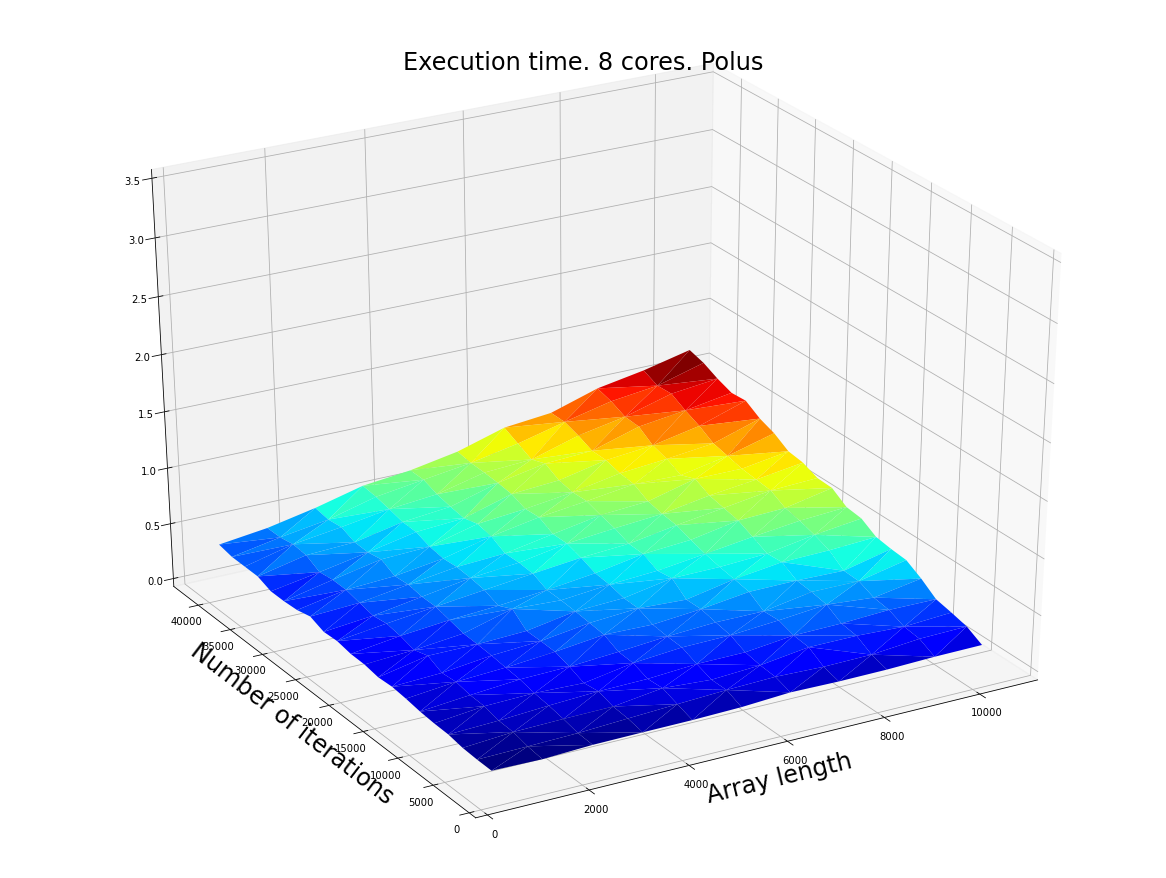

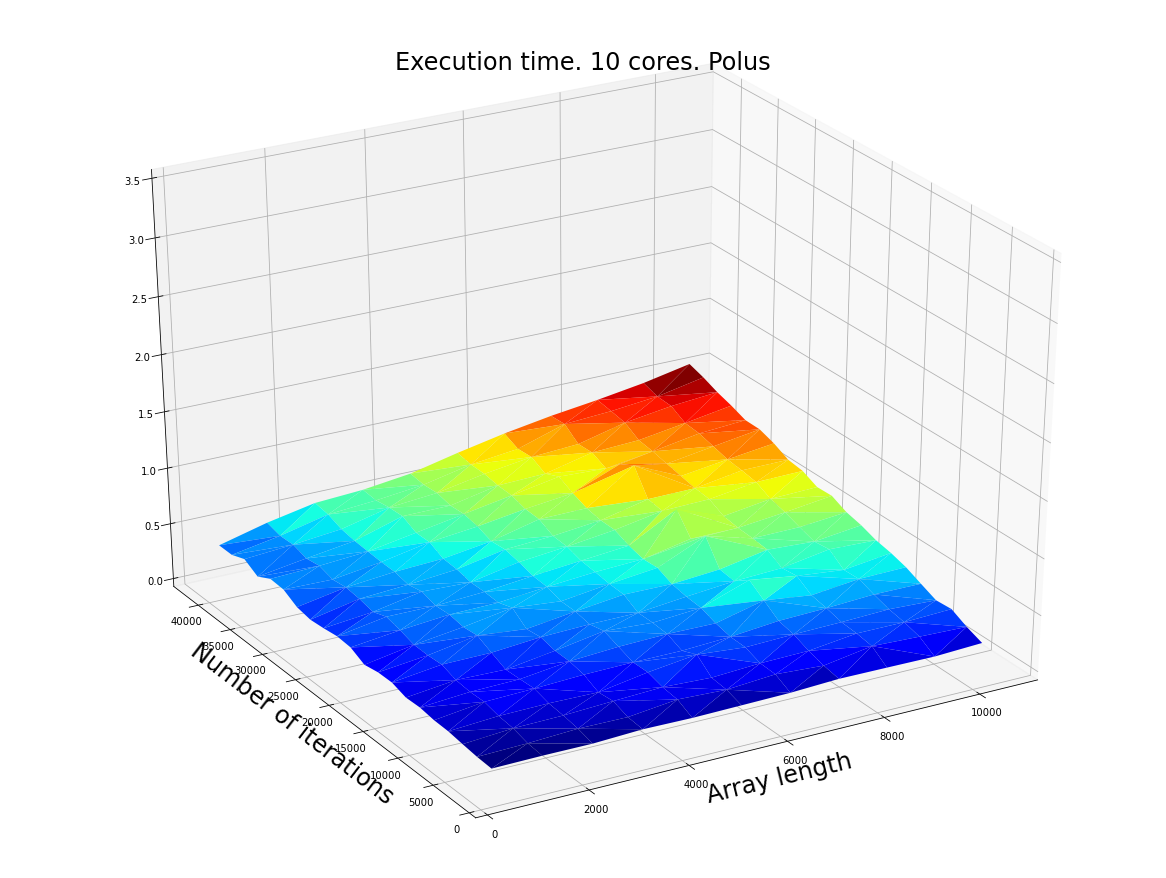

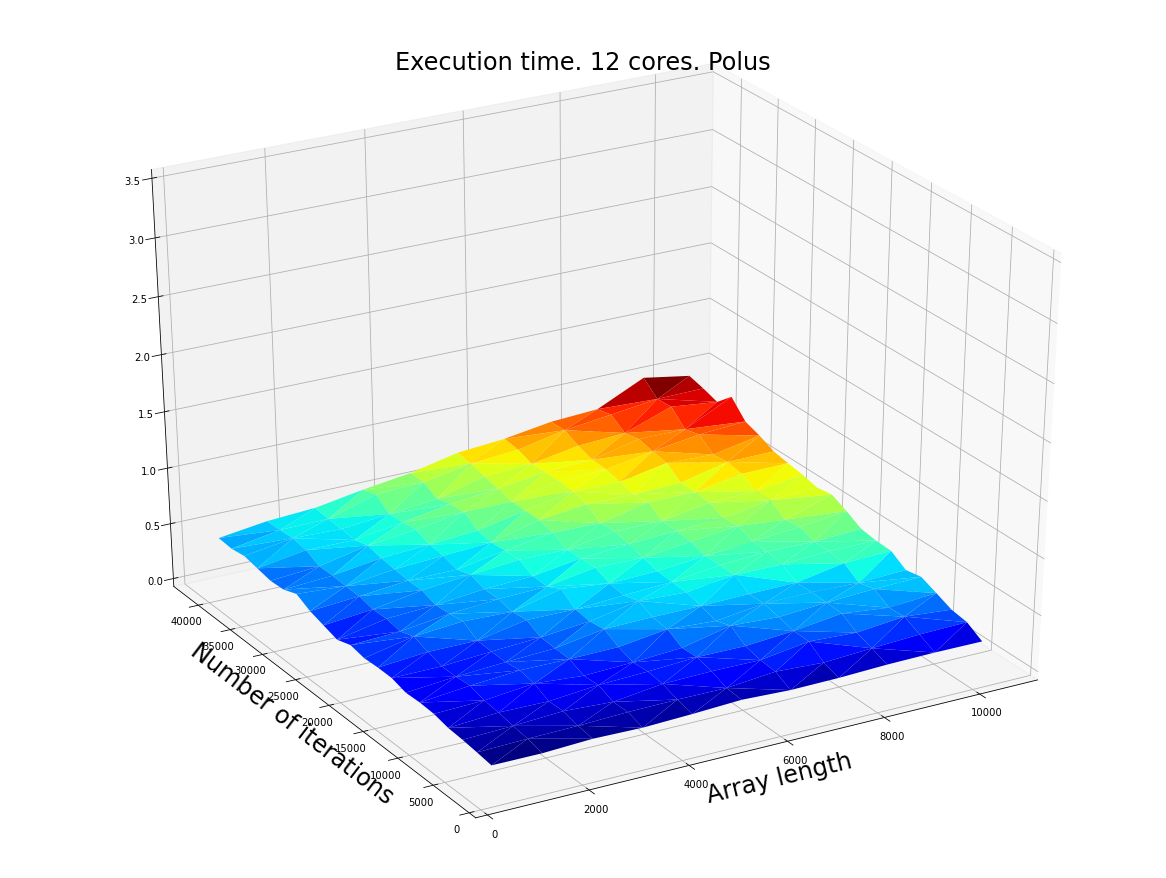

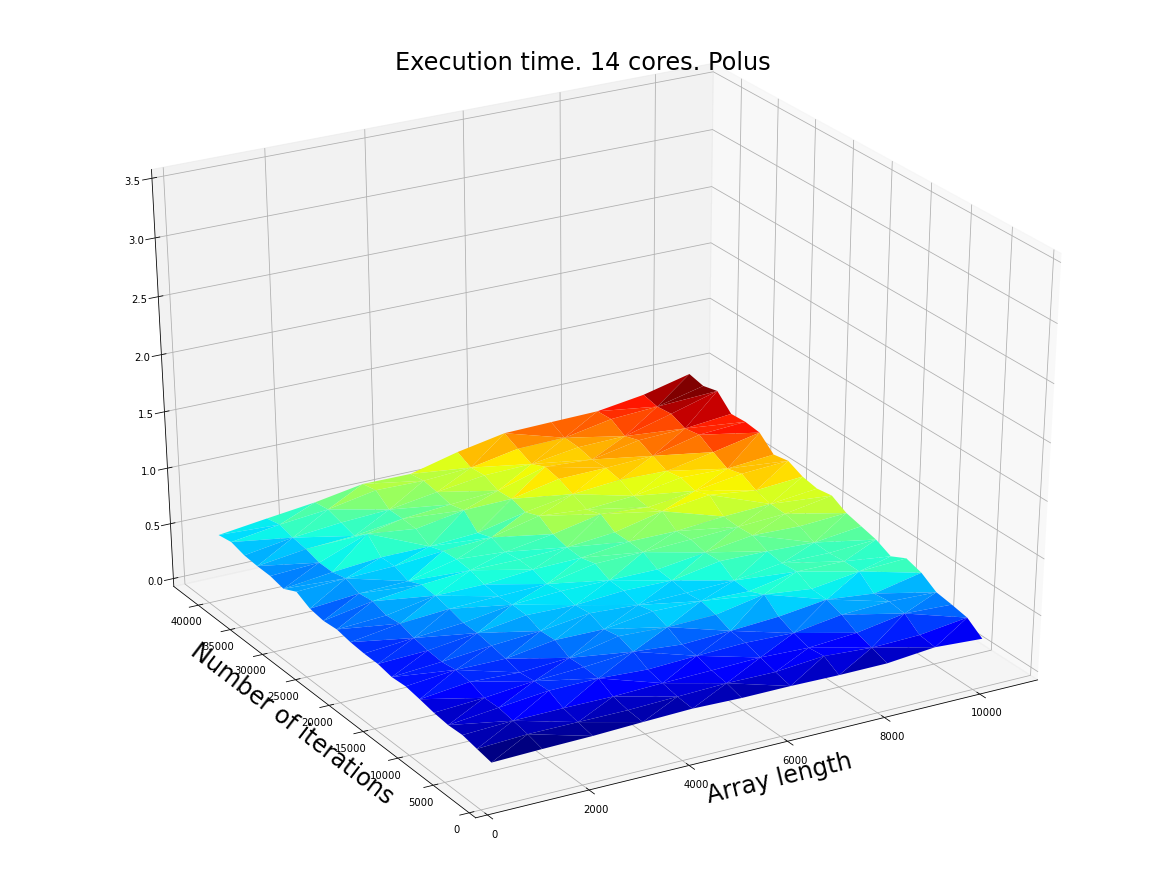

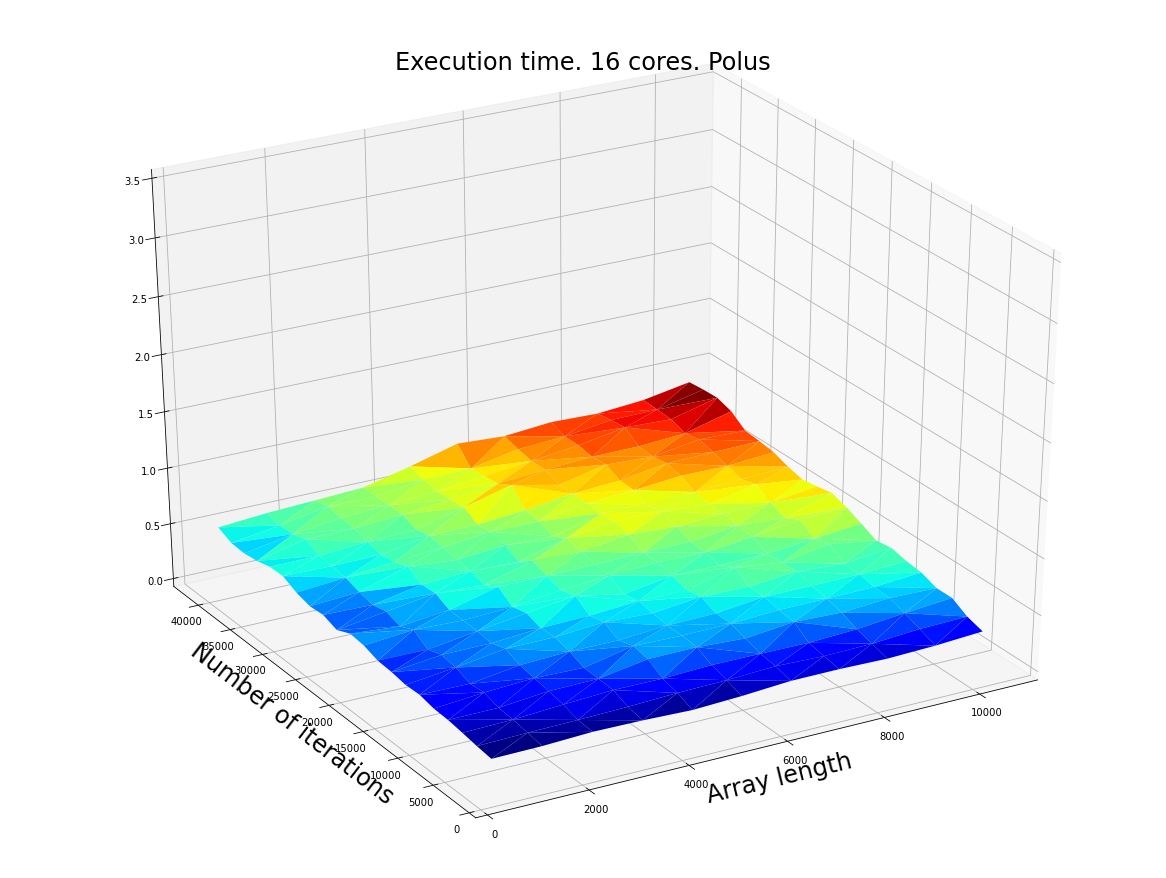

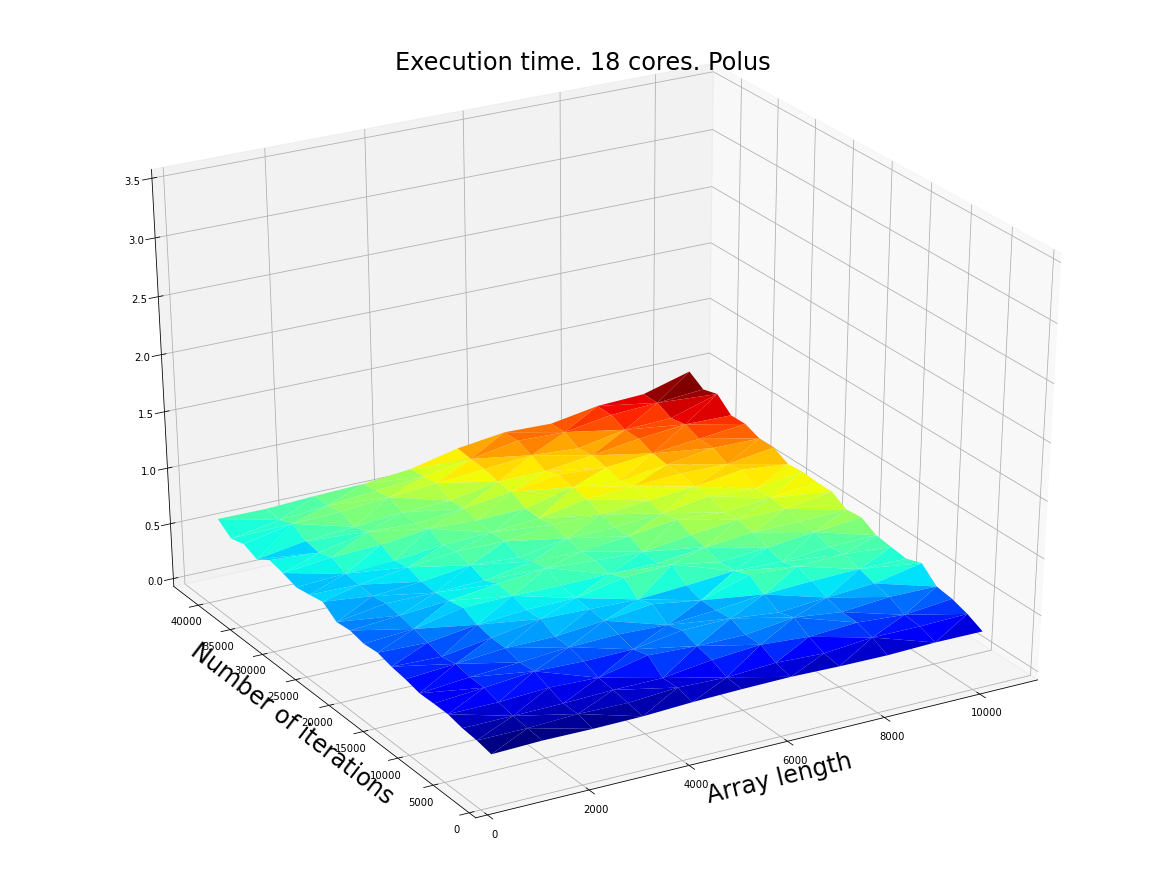

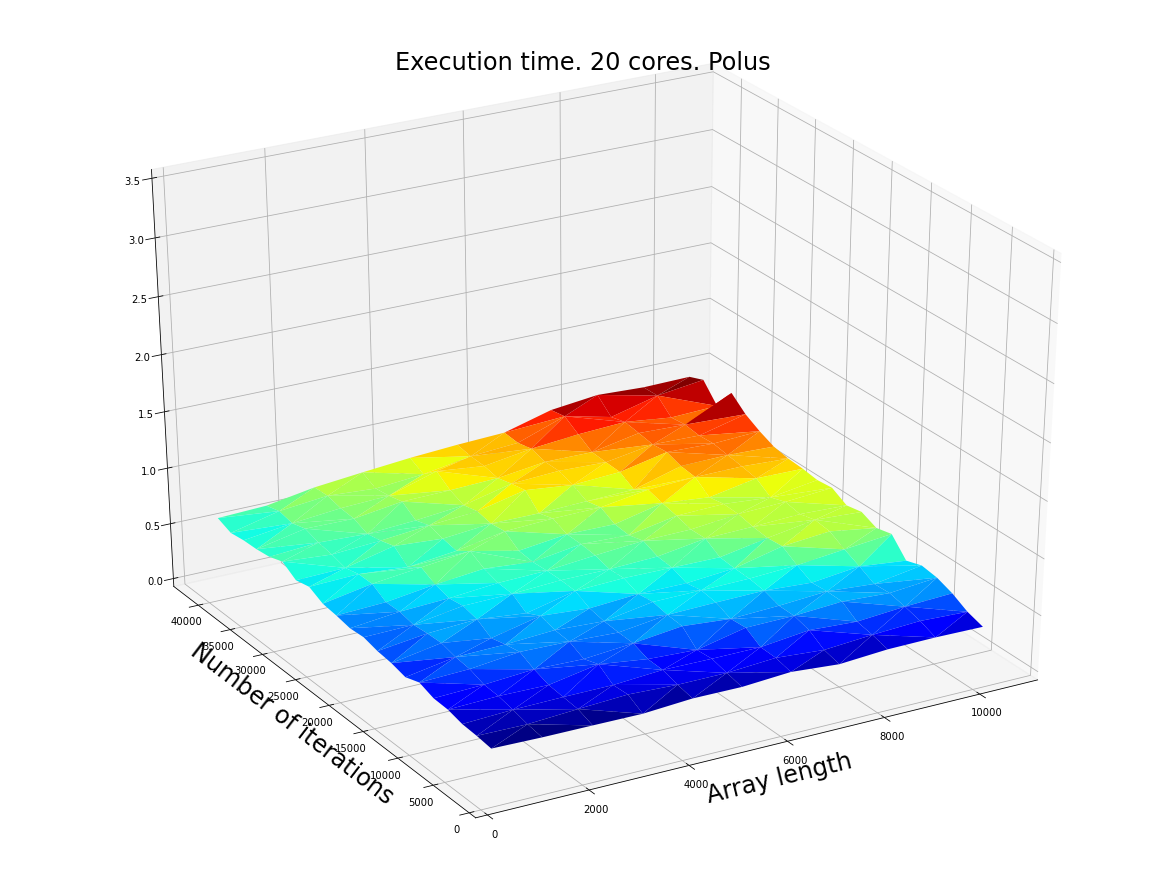

In [3]:
for n in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:
    x, y, z = makeDataPolus(data_path="polus_%d.txt" % n)
    fig = plt.figure(figsize=(16, 12))
    axes = Axes3D(fig, azim=-120)
    axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

    axes.set_xlim(0, 11000)
    axes.set_ylim(0, 43000)
    axes.set_zlim(0., 3.5)
    axes.set_title("Execution time. %d cores. Polus" % n, fontsize=24, fontweight=50, color="Black")
    axes.set_xlabel("Array length", fontsize=24, color="Black")
    axes.set_ylabel("Number of iterations",fontsize=24, color="Black")
    plt.show()

Execution time dependence on array length and number of computing nodes. Different optimization. Bluegene

In [4]:
def makeDataBluegene(data_path):
    data = pd.read_csv("data/" + data_path, sep=',', names=["PROC", "N", "TSTEPS", "TIME"])
    data_final = data[::3]
    length = len(data) // 3
    time = np.array(data["TIME"])
    time_new = np.zeros(length)
    for i in range(length):
        time_new[i] = (time[3*i] + time[3*i + 1] + time[3*i + 2]) / 3
    x = data_final["N"]
    y = data_final["PROC"]
    z = time_new
    return x, y, z

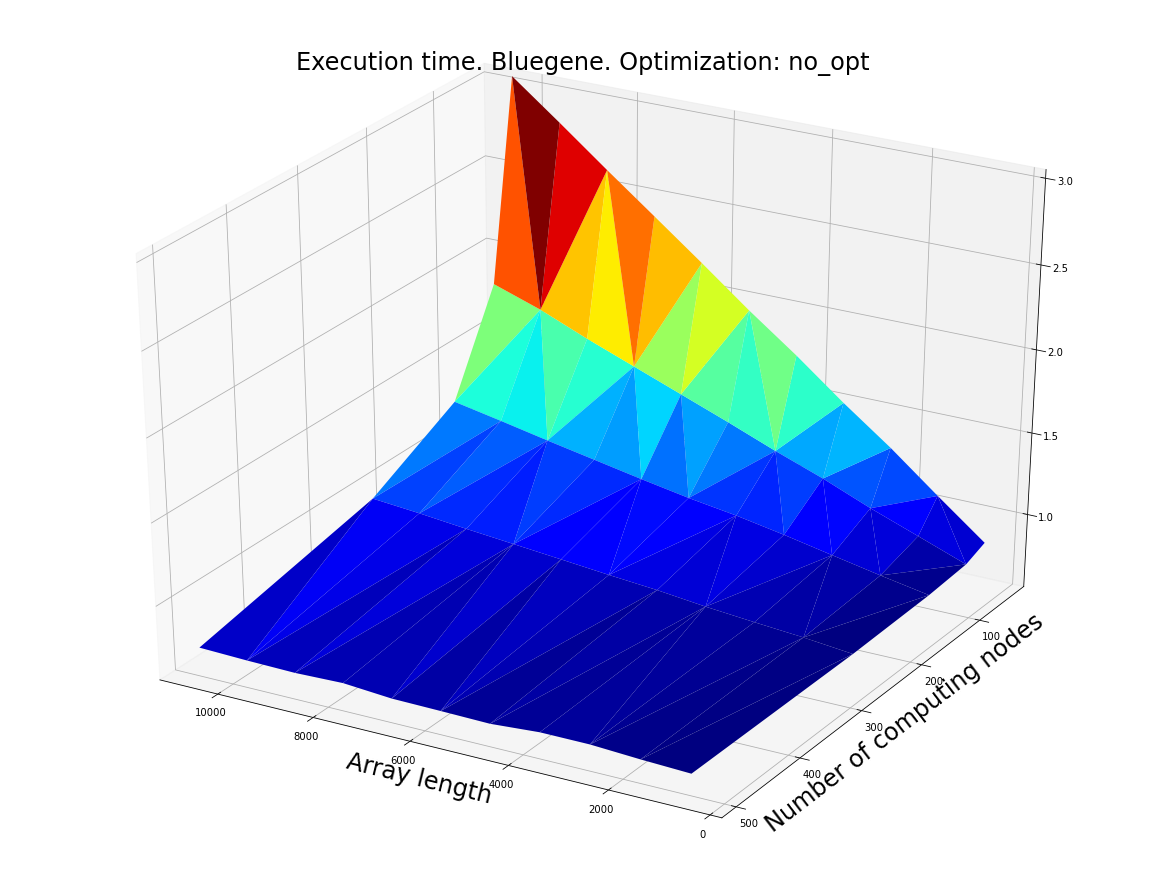

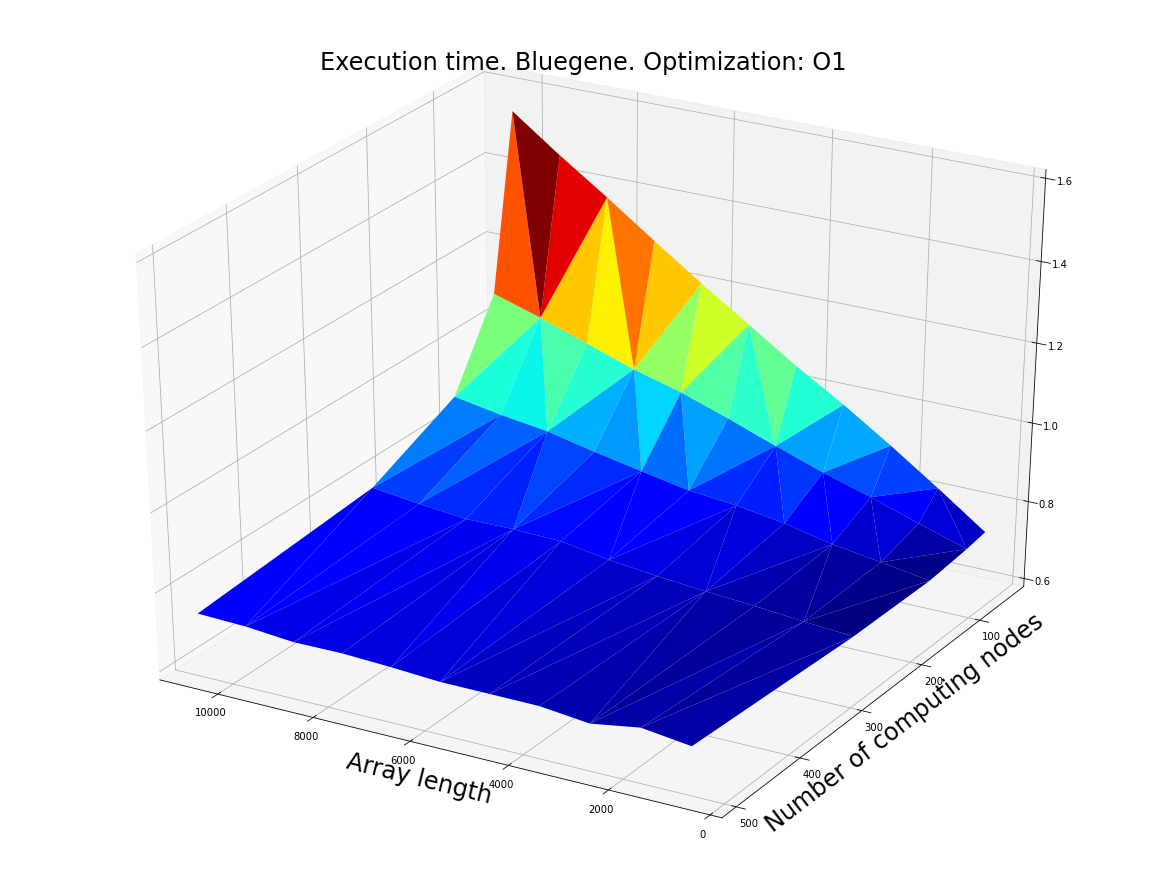

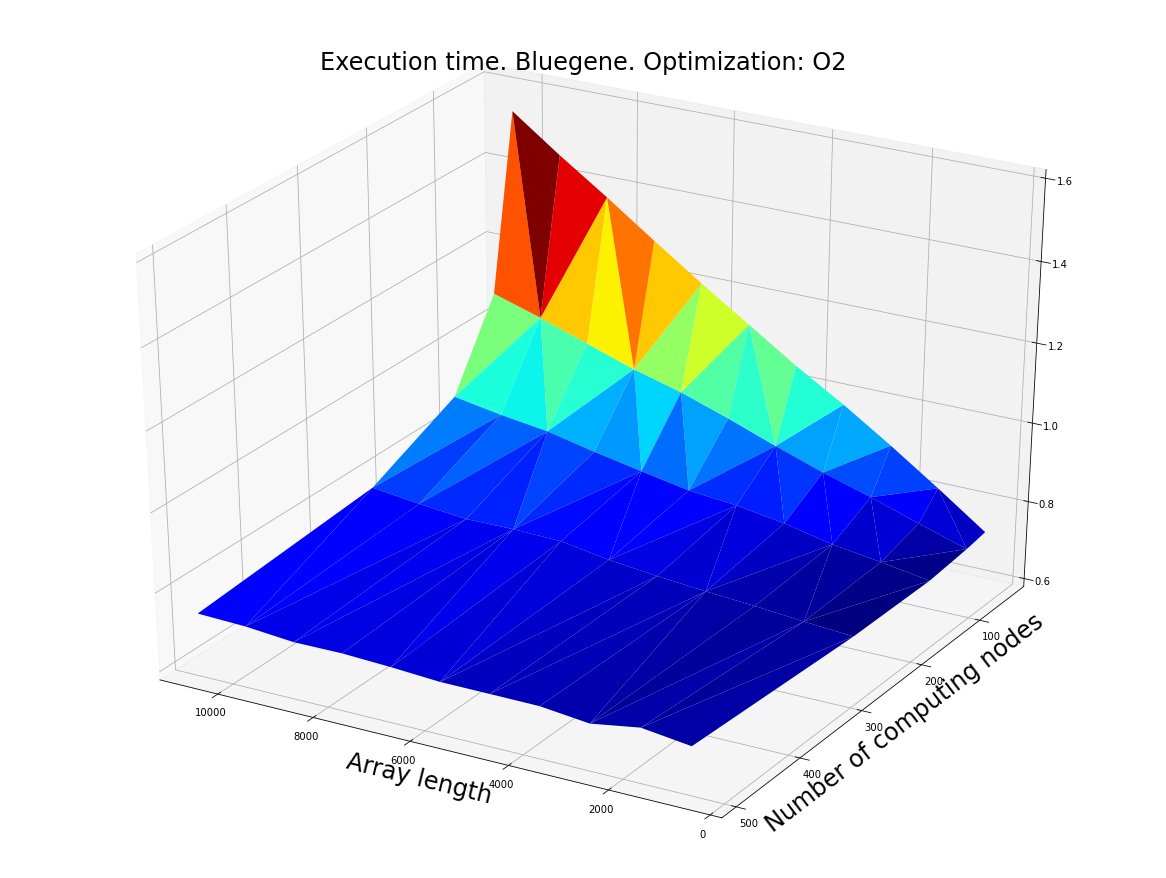

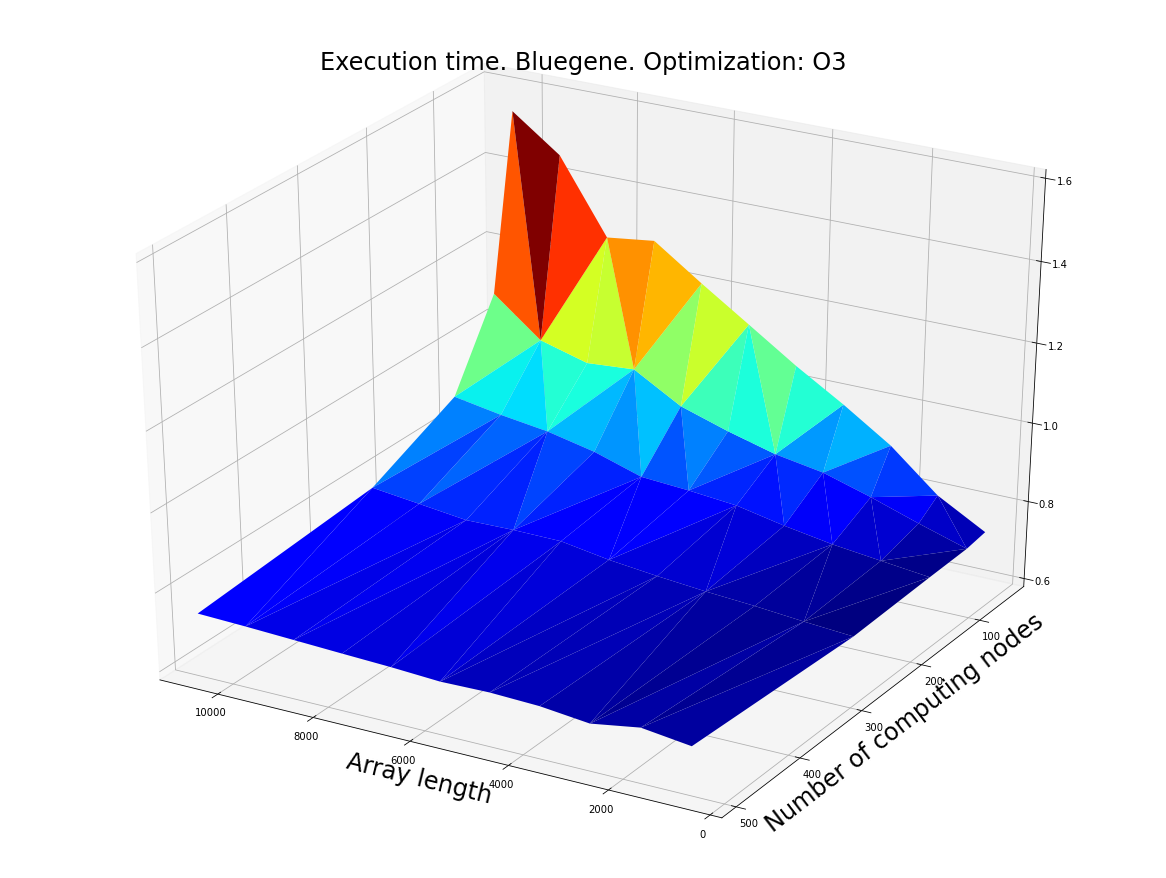

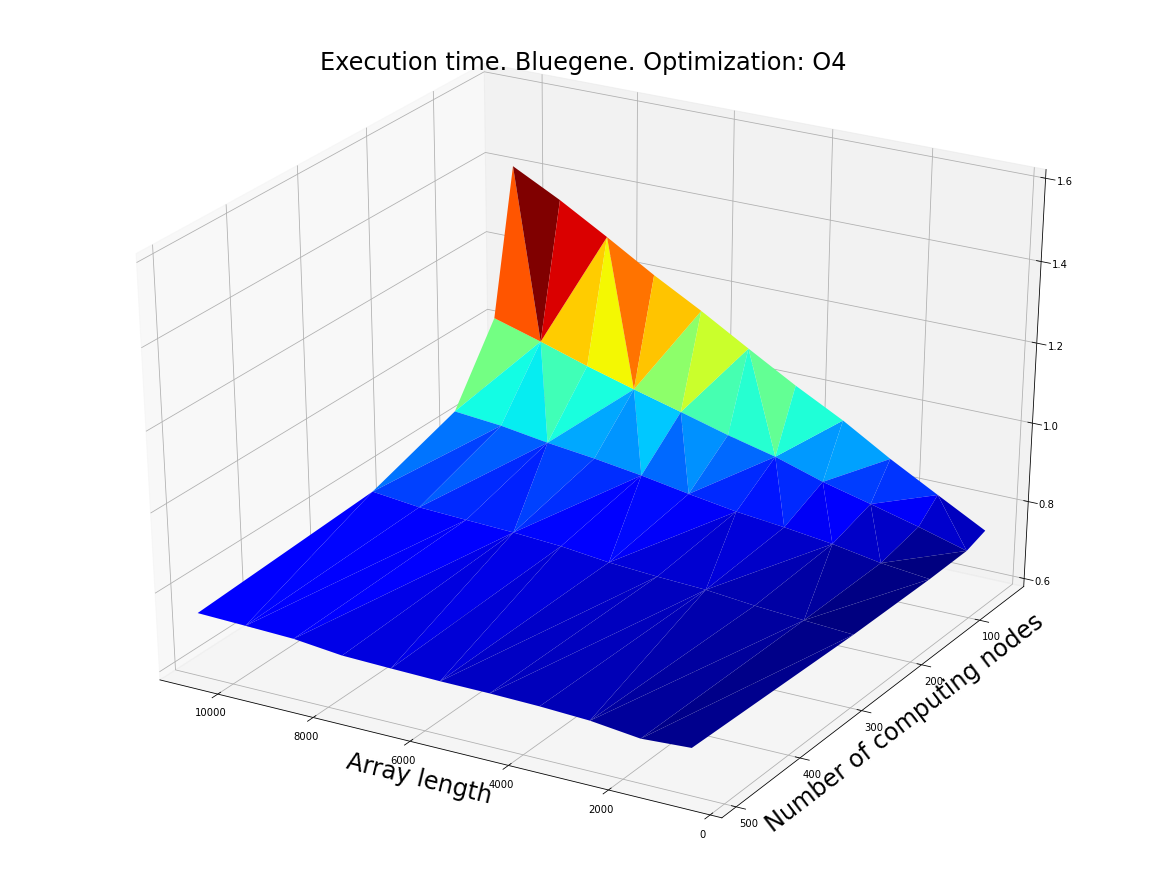

In [5]:
for opt in ["no_opt", "O1", "O2", "O3", "O4"]:
    x, y, z = makeDataBluegene(data_path="bluegene_%s.txt" % opt)
    fig = plt.figure(figsize=(16, 12))
    axes = Axes3D(fig, azim=120)
    axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

    axes.set_xlim(0, 11000)
    axes.set_ylim(32, 512)
    uplim = 1.6
    if opt == "no_opt":
        uplim = 3.
    axes.set_zlim(0.6, uplim)
    axes.set_title("Execution time. Bluegene. Optimization: %s" % opt, fontsize=24, fontweight=50, color="Black")
    axes.set_xlabel("Array length", fontsize=24, color="Black")
    axes.set_ylabel("Number of computing nodes",fontsize=24, color="Black")
    plt.show()